## ANLY580 Project 1

### 404 Not Found -- Heng Zhou, Hongyang Zheng, Zhengqian Xu

Overview of the main variables created in this part

* tweets -- raw tweets
* tweets_w -- no emoji
* tweets_1 -- no emoji, no URL, no @
* tweets_2 -- no emoji, no URL, no @, no punctuation
* tweets_clean -- no emoji, no URL, no @, no punctuation, no hash

* words_raw -- lowercase, split from tweets
* words -- lowercase, split from tweets_1
* words_clean -- lowercase, split from tweets_clean

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams 
from collections import Counter
import string
from statistics import stdev
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hongyang_zheng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Task 1 Exploratory Data Analysis

### Read Input Data

In [2]:
# Import data
with open('./data/Dev/INPUT.txt', encoding="utf-8") as file:
    tweets=[]
    for line in file:
        tweet=line.split('\t')[2]       
        tweets.append(tweet[:-1])

In [3]:
# Data without Emoji
with open('./data/Dev/INPUT.txt', encoding="utf-8") as file:
    tweets_w=[]
    for line in file:
        tweet=line.split('\t')[2] 
        tweet=tweet.encode('ascii', 'ignore').decode('ascii')
        tweets_w.append(tweet[:-1])

#### Q1 The total number of tweets

In [4]:
# The total number of tweets
len(tweets)

print('The total number of tweets is: ' + str(len(tweets)))

The total number of tweets is: 12284


### Preprocess the Data

In [5]:
def process_tweets(tweets):
    
    tweets_1=[]
    tweets_2=[]
    tweets_clean=[]

    for tweet in tweets:

        # Process text
        tokens = nltk.casual_tokenize(tweet)

        # Remove URL
        tokens =[term for term in tokens if not term.startswith('https://') ]
        tokens =[term for term in tokens if not term.startswith('http://') ]

        # Remove profiles
        tokens1 = [term for term in tokens if not term.startswith('@')]
        sentence1 = ' '.join(tokens1)
        if len(sentence1) != 0:
            tweets_1.append(sentence1)

        # Remove punctuation
        punctuation = list(string.punctuation)
        tokens2 = [term for term in tokens1 if term not in punctuation]
        sentence2 = ' '.join(tokens2)
        if len(sentence2) != 0:
            tweets_2.append(sentence2)

        # Remove hashtags
        tokens3 = [term for term in tokens2 if not term.startswith('#')]
        sentence3 = ' '.join(tokens3)
        if len(sentence3) != 0:
            tweets_clean.append(sentence3)
    
    return tweets_1, tweets_2, tweets_clean

tweets_1, tweets_2, tweets_clean = process_tweets(tweets_w)

In [6]:
# Compare different types of tweets
tweets[:5]
tweets_w[:5]
tweets_1[:5]
tweets_2[:5]
tweets_clean[:5]

['Ari By Ariana Grande 80 Full',
 'Ariana Grande KIIS FM Yours Truly CD listening party in Burbank',
 'Ariana Grande White House Easter Egg Roll in Washington',
 'Ariana Grande Sweet Like Candy 3.4 oz 100 ML Sealed In Box 100 Authenic New',
 'SIDE TO SIDE']

### Convert Tweets to words

In [7]:
# Convert to words
def getwords(tweets):
    # Convert to words
    words=[]
    for tweet in tweets:
        word=tweet.split()
        for x in word:
            # Need to convert to lowercase
            words.append(x.lower())
    return words

In [8]:
# Convert to raw words
words_raw=getwords(tweets)

# Convert to words without emoji, URL, @
words=getwords(tweets_1)

#### Q2 The total number of characters

In [9]:
# The total number of characters
num_char=0
for word in words:
    num_char=num_char+len(word)

num_char

print('The total number of characters is: ' + str(num_char))

The total number of characters is: 899721


#### Q3 The total number of distinct words (vocabulary)

In [10]:
# Convert to vocabulary words
words_clean=getwords(tweets_clean)

In [11]:
# The total number of distinct words (vocabulary)
words_list=Counter(words_clean)
len(words_list)

print('The total number of distinct words (vocabulary) is: ' + str(len(words_list)))

The total number of distinct words (vocabulary) is: 19190


#### Q4 The average number of characters and words in each tweet

In [12]:
# The average number of characters and words in each tweet
print('The average number of characters in each tweet is: ' + str(num_char//len(tweets)))
print('The average number of words in each tweet is: ' + str(len(words)//len(tweets)))

The average number of characters in each tweet is: 73
The average number of words in each tweet is: 16


#### Q5 The average number and standard deviation of characters per token

In [13]:
# The average number and standard deviation of characters per token
print('The average number of characters per token is: ' + str(num_char//len(words)))

# Calculate number of characters in each token
num_char_per_token=list((map(len, words)))

print('The standard deviation of characters per token is: ' + str(round(stdev(num_char_per_token), 2)))

The average number of characters per token is: 4
The standard deviation of characters per token is: 3.12


#### Q6 The total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary

In [14]:
# The total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary
top_10=list(words_list.most_common(10))
sum_top10=0
top_10

for type in top_10:
    sum_top10+=type[1]
    
print('The total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary is: ' + str(sum_top10))

The total number of tokens corresponding to the top 10 most frequent words (types) in the vocabulary is: 27100


#### Q7 The token/type ratio in the dataset

In [15]:
# The token/type ratio in the dataset
print('The token/type ratio in the dataset is: ' + str(len(words)//len(words_list)))

The token/type ratio in the dataset is: 10


#### Q8 The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4,5

In [16]:
# The total number of distinct n-grams (of words) that appear in the dataset for n=2,3,4,5
def ngrams_word(all_sentences,n):
    all_ngram = []
    for s in all_sentences:
        tokens = [token for token in s.split(" ") if token != ""]
        grams = list(ngrams(tokens, n))
        all_ngram = all_ngram+grams
    
    bigrams_freq = Counter(all_ngram)
    return len(bigrams_freq)

for n in range(2,6):
    distinct_n_gram = ngrams_word(tweets_1,n)
    print('The total number of distinct %d-grams of words that appear in the dataset is: %d'%(n,distinct_n_gram))

The total number of distinct 2-grams of words that appear in the dataset is: 122817


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: generator 'ngrams' raised StopIteration
  


The total number of distinct 3-grams of words that appear in the dataset is: 161600
The total number of distinct 4-grams of words that appear in the dataset is: 159666
The total number of distinct 5-grams of words that appear in the dataset is: 149553


#### Q9 The total number of distinct n-grams of characters that appear for n=2,3,4,5,6,7

In [17]:
def ngrams_char(all_sentences,n):
    all_ngram = []
    for s in all_sentences:
        tokens = [token for token in s.split(" ") if token != ""]
        words_join="".join(tokens)
        grams = list(ngrams(words_join, n))
        all_ngram = all_ngram+grams
    
    bigrams_freq = Counter(all_ngram)
    return len(bigrams_freq)

# The total number of distinct n-grams of characters that appear for n=2,3,4,5,6,7
for n in range(2,8):
    distinct_n_gram_2 = ngrams_char(tweets_1,n)
    print('The total number of distinct %d-grams of characters that appear in the dataset is: %d'%(n,distinct_n_gram_2))

The total number of distinct 2-grams of characters that appear in the dataset is: 5884
The total number of distinct 3-grams of characters that appear in the dataset is: 53363
The total number of distinct 4-grams of characters that appear in the dataset is: 166211
The total number of distinct 5-grams of characters that appear in the dataset is: 318509


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: generator 'ngrams' raised StopIteration
  


The total number of distinct 6-grams of characters that appear in the dataset is: 454940
The total number of distinct 7-grams of characters that appear in the dataset is: 554120


#### Q10-1 Plot a token log frequency. 

In [18]:
# Compute Log Freq
top_100=list(words_list.most_common(100))
log_count=[]
X=[]

for term in top_100:
    log_count.append(np.log(term[1]))
    X.append(term[0])

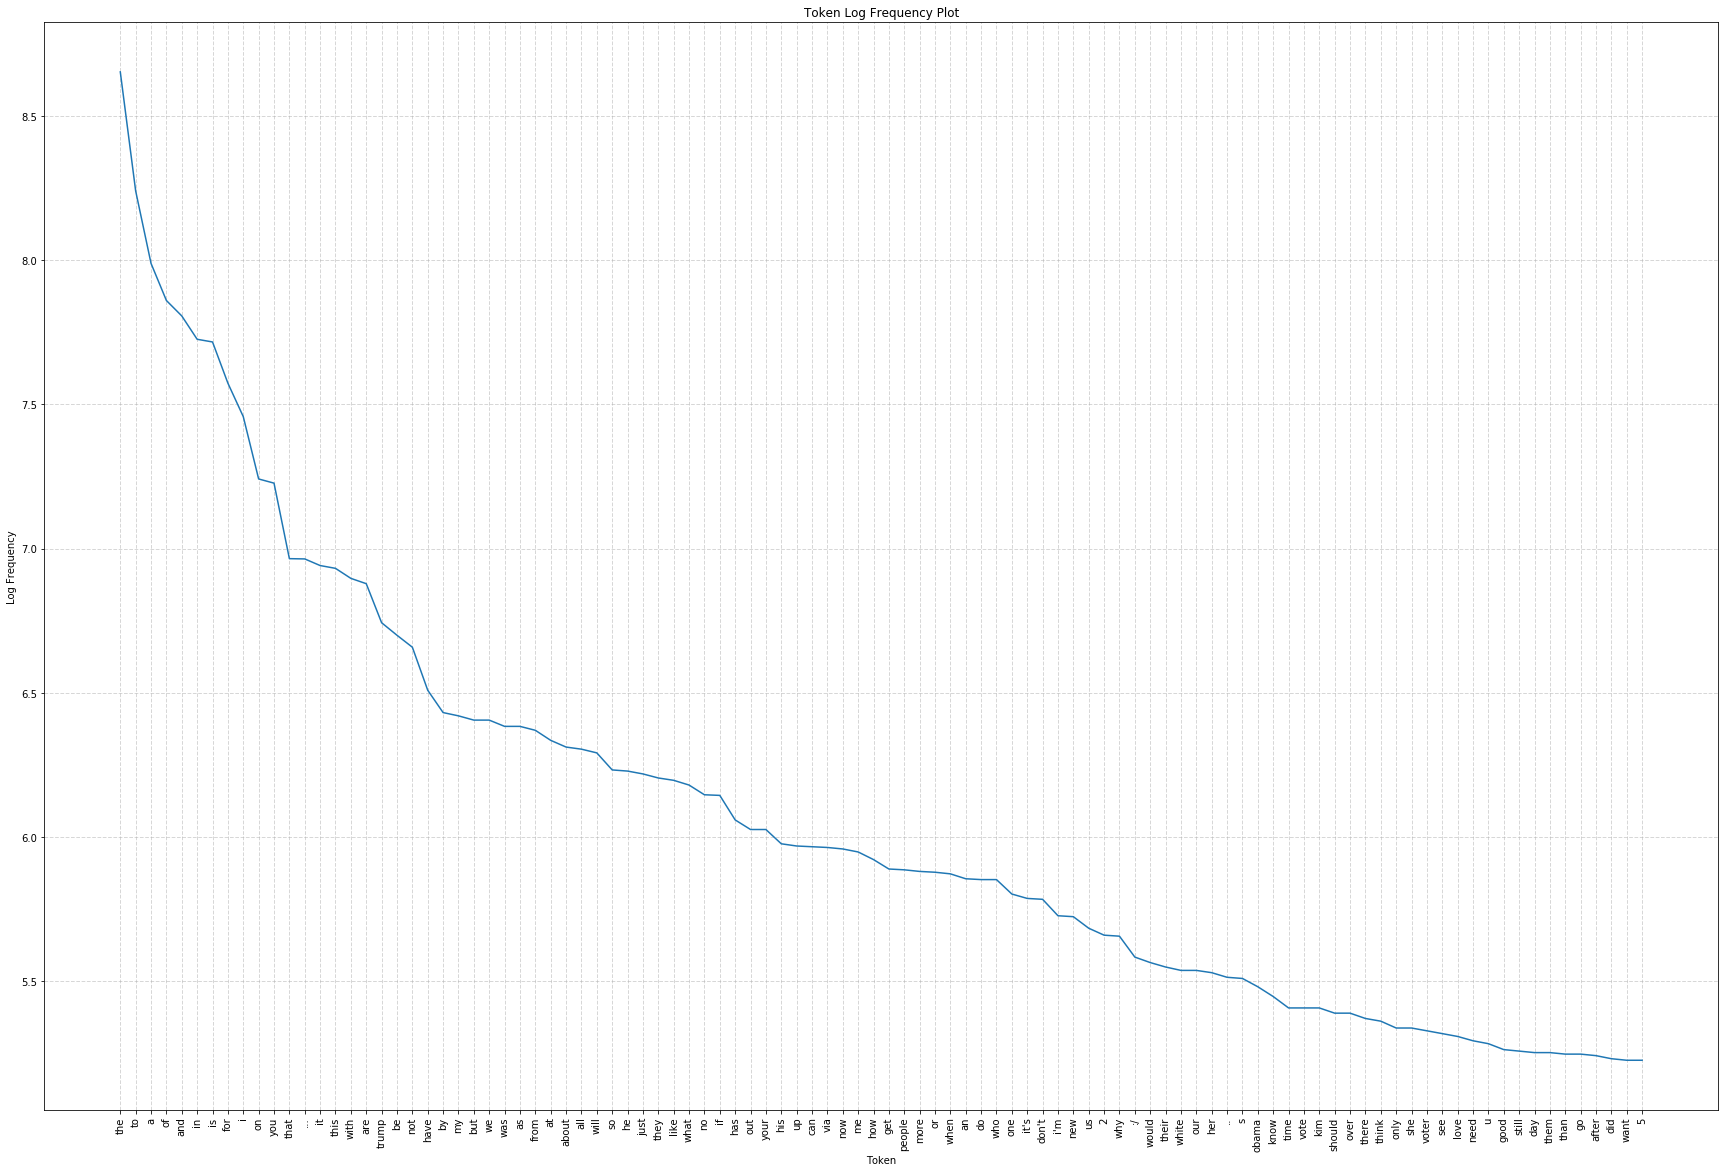

In [19]:
# Plot a token log frequency
plt.figure(figsize=(30, 20));

plt.plot(X, log_count);
plt.xlabel('Token');
plt.ylabel('Log Frequency');
plt.title('Token Log Frequency Plot');
plt.xticks(rotation=90);
plt.grid(which='major', linestyle='--', linewidth=1, alpha=0.5);
plt.show();

#### Q10-2  Describe what this plot means and how to interpret it.

This graph shows each token and its corresponding count frequency. The higher the log frequency is, the more common the token is.

### Read other datasets

In [20]:
# Import data
with open('./data/Gold/train.txt', encoding="utf-8") as file:
    train=[]
    train_y = []
    for line in file:
        tweet_train=line.split('\t')[2] 
        tweet_train=tweet_train.encode('ascii', 'ignore').decode('ascii')
        train.append(tweet_train[:-1])
        train_y.append(line.split('\t')[1])

with open('./data/Gold/test.txt', encoding="utf-8") as file:
    test=[]
    test_y = []
    for line in file:
        tweet_test=line.split('\t')[2] 
        tweet_test=tweet_test.encode('ascii', 'ignore').decode('ascii')
        test.append(tweet_test[:-1])
        test_y.append(line.split('\t')[1])
        
with open('./data/Gold/dev.txt', encoding="utf-8") as file:
    dev=[]
    dev_y = []
    for line in file:
        tweet_dev=line.split('\t')[2] 
        tweet_dev=tweet_dev.encode('ascii', 'ignore').decode('ascii')
        dev.append(tweet_dev[:-1])
        dev_y.append(line.split('\t')[1])  
        
with open('./data/Gold/devtest.txt', encoding="utf-8") as file:
    devt=[]
    devt_y = []
    for line in file:
        tweet_devt=line.split('\t')[2] 
        tweet_devt=tweet_devt.encode('ascii', 'ignore').decode('ascii')
        devt.append(tweet_devt[:-1])
        devt_y.append(line.split('\t')[1])       

In [21]:
# Preprocess the data
train_1, train_2, train_clean = process_tweets(train)
test_1, test_2, test_clean = process_tweets(test)
dev_1, dev_2, dev_clean = process_tweets(dev)
devt_1, devt_2, devt_clean = process_tweets(devt)

In [22]:
# Generate words list
words_train = getwords(train_1)
words_train_clean = getwords(train_clean)

words_dev = getwords(dev_1)
words_dev_clean = getwords(dev_clean)

words_devt = getwords(devt_1)
words_devt_clean = getwords(devt_clean)

words_test = getwords(test_1)
words_test_clean = getwords(test_clean)

#### Q11 What is the number of types that appear in the dev data but not the training data (OOV)?

In [23]:
# What is the number of types that appear in the dev data but not the training data (OOV).?
all_words = words_train_clean+words_dev_clean+words_devt_clean+words_test_clean
print('The number of types that appear in the input data but not the training data:',len(set(words_clean)-set(all_words)))

The number of types that appear in the input data but not the training data: 8540


#### Q12 Look at the vocabulary growth (types) combining your four gold data sets against your input data. Plot vocabulary growth at difference sample sizes N. 

In [24]:
# count the vocabulary growth
all_sentence = train_clean+test_clean+dev_clean+devt_clean+ tweets_clean
word_cnt = []
for i in range(0,len(all_sentence),1000):
    subset = all_sentence[:i]
    word_sub = getwords(subset)
    word_cnt.append(len(Counter(word_sub)))

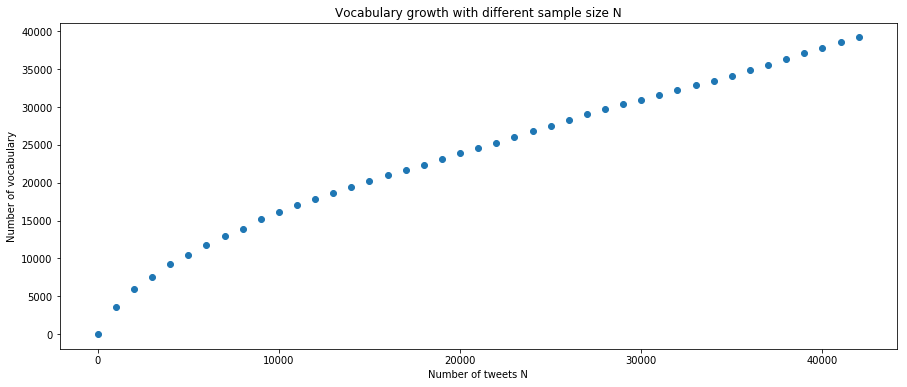

In [25]:
# make a visualization
num = list(range(0,len(all_sentence),1000))
plt.figure(figsize=(15,6))
plt.scatter(x=num,y= word_cnt)
plt.xlabel('Number of tweets N')
plt.ylabel('Number of vocabulary')
plt.title('Vocabulary growth with different sample size N')
plt.show()

In [26]:
# count the vocabulary growth
all_sentence = train_clean+test_clean+dev_clean+devt_clean
word_cnt = []
for i in range(0,len(all_sentence),1000):
    subset = all_sentence[:i]
    word_sub = getwords(subset)
    word_cnt.append(len(Counter(word_sub))/len(words_list))

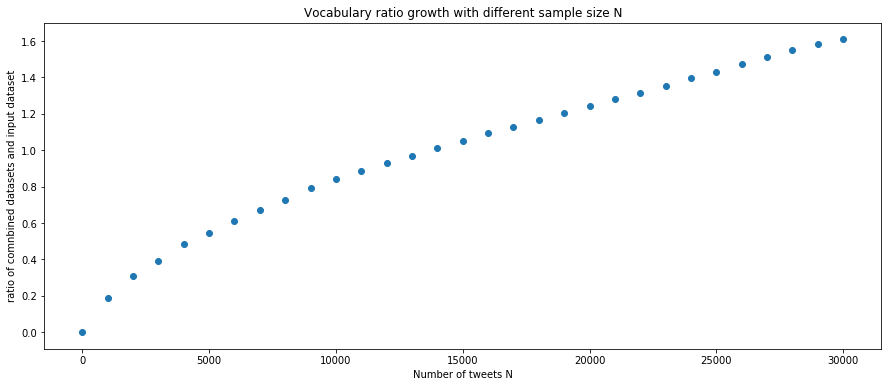

In [27]:
# make a visualization
num = list(range(0,len(all_sentence),1000))
plt.figure(figsize=(15,6))
plt.scatter(x=num,y= word_cnt)
plt.xlabel('Number of tweets N')
plt.ylabel('ratio of comnbined datasets and input dataset')
plt.title('Vocabulary ratio growth with different sample size N')
plt.show()

#### Q13 What is the class distribution of the training data set - how many negative, neutral, positive tweets?

In [28]:
# Class distribution of training data set
ne=train_y.count('negative')
neu=train_y.count('neutral')
po=train_y.count('positive')

print('The number of negative class in training data set is: ' + str(ne))
print('The number of neutral class in training data set is: ' + str(neu))
print('The number of positive class in training data set is: ' + str(po))

The number of negative class in training data set is: 863
The number of neutral class in training data set is: 2043
The number of positive class in training data set is: 3094


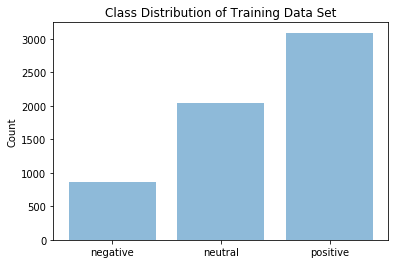

In [29]:
objects = ('negative', 'neutral', 'positive')
y_pos = np.arange(len(objects))
performance = [ne,neu,po]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Class Distribution of Training Data Set')

plt.show()

#### Q14 Look at the difference between the top word types across these three classes.

In [30]:
# Look at the difference between the top word types across these three classes
train_positive=[]
train_negative=[]
train_neutral=[]

for i, x in enumerate(train_y):
    if x == 'positive':
        train_positive.append(train_1[i])
    elif x == 'negative':
        train_negative.append(train_1[i])
    else:
        train_neutral.append(train_1[i])  

# Generate list
train_pos_counter=Counter(getwords(train_positive))
train_neg_counter=Counter(getwords(train_negative))
train_neu_counter=Counter(getwords(train_neutral))

In [31]:
# Top 100 elements
pos_list=train_pos_counter.most_common(100)
neg_list=train_neg_counter.most_common(100)
neu_list=train_neu_counter.most_common(100)

In [32]:
# Compare 
for a, b, c in zip(pos_list, neg_list, neu_list):
    print(a, b, c)

('the', 2412) ('.', 748) ('the', 1626)
('.', 2191) ('the', 712) ('.', 1379)
(',', 1469) ('to', 443) (',', 987)
('to', 1428) (',', 411) ('to', 940)
('!', 1218) ('i', 298) ('on', 615)
('i', 977) ('a', 296) ('in', 600)
('a', 904) ('is', 245) ('a', 577)
('on', 885) ('on', 240) ('i', 556)
('and', 885) ('and', 238) ('and', 547)
('in', 802) ('of', 217) ('of', 460)
('of', 749) ('may', 216) ('is', 436)
('for', 736) ('in', 208) ('may', 420)
('is', 634) ('it', 184) ('for', 409)
('you', 607) ('?', 161) ('?', 395)
('tomorrow', 567) ('"', 160) (':', 394)
('with', 561) ('be', 156) ('...', 381)
('at', 510) ('for', 154) ('with', 341)
('be', 497) ('you', 144) ('be', 339)
('...', 497) ('!', 130) ('you', 337)
('it', 471) ('but', 129) ('"', 320)
('may', 457) ('my', 129) ('it', 297)
('?', 398) ('that', 125) ('at', 269)
('my', 390) ('with', 118) ('have', 260)
(':', 381) ('not', 116) ('that', 248)
('"', 360) ('...', 109) ('tomorrow', 231)
('day', 320) ('have', 108) ('!', 227)
('have', 312) (':', 105) ('-', 22

For most common words in postive attitude, we can see: `up`, `good`, `best`, `love`, `happy`, `great` and other words used to describe good things. For most common words in negative attitude, we can see: `trump`, `bush`, `hillary`, `can't` and other words used to describe politicians or deny something. For neutral words, we can see: `apple`, `google`, `can`, `don't` and other words used to describe an object.

#### Q15 What words are particularly characteristic of your training set and dev set? Are they the same? 

In [33]:
# What words are particularly characteristic of your training set and dev set? Are they the same?
train_tokens = [term for term in words_train_clean if term not in stopwords.words('english')]
dev_tokens = [term for term in words_dev_clean if term not in stopwords.words('english')]

In [34]:
Counter(dev_tokens).most_common()

[('may', 397),
 ('...', 332),
 ('tomorrow', 232),
 ('obama', 187),
 ('1st', 152),
 ('like', 130),
 ("i'm", 124),
 ('time', 117),
 ('sunday', 110),
 ('minecraft', 108),
 ('snoop', 107),
 ('pride', 106),
 ('going', 105),
 ('pope', 105),
 ('netflix', 104),
 ('parade', 104),
 ('scotus', 103),
 ('rick', 103),
 ('michael', 102),
 ('michelle', 102),
 ('nike', 102),
 ('nokia', 102),
 ('sarah', 102),
 ('palin', 101),
 ('oracle', 101),
 ('planned', 101),
 ('ric', 101),
 ('serena', 100),
 ('jackson', 99),
 ('dogg', 99),
 ('nintendo', 97),
 ('parenthood', 97),
 ('seinfeld', 94),
 ('one', 92),
 ('monsanto', 92),
 ('perry', 92),
 ('make', 87),
 ('3rd', 86),
 ('day', 85),
 ('night', 85),
 ('see', 82),
 ('us', 80),
 ('2nd', 79),
 ('friday', 75),
 ('flair', 74),
 ('get', 73),
 ('saturday', 72),
 ('new', 72),
 ('go', 71),
 ('sun', 69),
 ('think', 67),
 ('know', 63),
 ('still', 60),
 ('venus', 60),
 ('want', 59),
 ('watch', 57),
 ('u', 55),
 ('back', 55),
 ('first', 55),
 ('monday', 51),
 ('would', 51),


In [35]:
Counter(train_tokens).most_common()

[('may', 1093),
 ('...', 987),
 ('tomorrow', 873),
 ('day', 544),
 ('going', 406),
 ("i'm", 396),
 ('1st', 364),
 ('see', 358),
 ('like', 344),
 ('friday', 331),
 ('amazon', 329),
 ('time', 325),
 ('new', 317),
 ('get', 310),
 ('apple', 291),
 ('watch', 274),
 ('go', 265),
 ('2nd', 264),
 ('night', 261),
 ('one', 245),
 ('saturday', 234),
 ('game', 229),
 ('prime', 229),
 ('google', 222),
 ('david', 214),
 ('jurassic', 212),
 ('sunday', 211),
 ('want', 206),
 ('today', 196),
 ('3rd', 191),
 ('world', 191),
 ('think', 188),
 ('make', 182),
 ('know', 173),
 ('monday', 169),
 ('still', 168),
 ('iphone', 167),
 ('thursday', 164),
 ('last', 162),
 ('best', 161),
 ('sun', 160),
 ('good', 157),
 ('5', 151),
 ('back', 149),
 ("can't", 148),
 ('trump', 148),
 ('next', 143),
 ('got', 141),
 ('love', 141),
 ('2', 139),
 ('us', 137),
 ('september', 137),
 ('sat', 131),
 ('show', 130),
 ('4th', 129),
 ('park', 128),
 ('galaxy', 128),
 ('tuesday', 127),
 ('donald', 126),
 ('note', 125),
 ('come', 12

For training dataset, the particularly characteristic words include: `best`, `good`, `love`, `dead`, `great`, `grateful`, `magic`, `happy`, `well`, `excited`, `thank`, `fuck`, `nice`, `miss` and etc.

For dev dataset, the particularly characteristic words include: `like`, `best`, `good`, `love`, `well`, `win`, `great`, `happy`, `better`, `thank`, `bad` and etc.

Most particularly characteristic words are same.